<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-To-Probabilistic-Graphical-Models----Practical-Session-1" data-toc-modified-id="Introduction-To-Probabilistic-Graphical-Models----Practical-Session-1-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction To Probabilistic Graphical Models -- Practical Session 1</a></span><ul class="toc-item"><li><span><a href="#Question-0" data-toc-modified-id="Question-0-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Question 0</a></span></li><li><span><a href="#Question-1" data-toc-modified-id="Question-1-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Question 1</a></span><ul class="toc-item"><li><span><a href="#1-Choose-the-appropriate-random-variables,-define-their-domains,-write-down-the-generative-model-and-draw-the-associated-directed-graphical-model." data-toc-modified-id="1-Choose-the-appropriate-random-variables,-define-their-domains,-write-down-the-generative-model-and-draw-the-associated-directed-graphical-model.-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>1 Choose the appropriate random variables, define their domains, write down the generative model and draw the associated directed graphical model.</a></span></li><li><span><a href="#Define-the-conditional-probability-tables-(i.e.,-the-transition-model-and-the-observation-model)-given-the-verbal" data-toc-modified-id="Define-the-conditional-probability-tables-(i.e.,-the-transition-model-and-the-observation-model)-given-the-verbal-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Define the conditional probability tables (i.e., the transition model and the observation model) given the verbal</a></span></li></ul></li><li><span><a href="#Specify-the-following-verbal-statements-in-terms-of-posterior-quantities-using-mathematical-notation.-For-example-“the-distribution-of-the-robot’s-location-two-time-steps-later-given-its-current-position-at-time-k&quot;-should-be-answered-as-$p(x_{k+2}|x_k)$." data-toc-modified-id="Specify-the-following-verbal-statements-in-terms-of-posterior-quantities-using-mathematical-notation.-For-example-“the-distribution-of-the-robot’s-location-two-time-steps-later-given-its-current-position-at-time-k&quot;-should-be-answered-as-$p(x_{k+2}|x_k)$.-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Specify the following verbal statements in terms of posterior quantities using mathematical notation. For example “the distribution of the robot’s location two time steps later given its current position at time k" should be answered as $p(x_{k+2}|x_k)$.</a></span></li><li><span><a href="#4-Implement-a-program-that-simulates-this-scenario;-i.e.,-generates-realizations-from-the-movements-of-the-robot-and-the-associated-sensor-readings.-Simulate-a-scenario-for-$k-=-1...100$-with-$N-=-50$,-$\epsilon-=-0,3$,$-w-=-0.8$." data-toc-modified-id="4-Implement-a-program-that-simulates-this-scenario;-i.e.,-generates-realizations-from-the-movements-of-the-robot-and-the-associated-sensor-readings.-Simulate-a-scenario-for-$k-=-1...100$-with-$N-=-50$,-$\epsilon-=-0,3$,$-w-=-0.8$.-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>4 Implement a program that simulates this scenario; i.e., generates realizations from the movements of the robot and the associated sensor readings. Simulate a scenario for $k = 1...100$ with $N = 50$, $\epsilon = 0,3$,$ w = 0.8$.</a></span></li><li><span><a href="#Implement-the-Forward-Backward-algorithm-for-computing-the-quantities-defined-in-3-a,b,f.-(Attention:-be-careful-with-numerical-stability!-Modify-the-log-sum-exp-trick-for-this-algorithm)" data-toc-modified-id="Implement-the-Forward-Backward-algorithm-for-computing-the-quantities-defined-in-3-a,b,f.-(Attention:-be-careful-with-numerical-stability!-Modify-the-log-sum-exp-trick-for-this-algorithm)-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Implement the Forward-Backward algorithm for computing the quantities defined in 3-a,b,f. (Attention: be careful with numerical stability! Modify the log-sum-exp trick for this algorithm)</a></span></li><li><span><a href="#Assume-now-that-at-each-step-the-robot-can-be-kidnapped-with-probability-κ.-If-the-robot-is-kidnapped-its-new-position-is-independent-from-its-previous-position-and-is-uniformly-distributed.-Repeat-4-and-5-for-this-new-model-with-$\kappa-=-0.1$.-Can-you-reuse-your-code?" data-toc-modified-id="Assume-now-that-at-each-step-the-robot-can-be-kidnapped-with-probability-κ.-If-the-robot-is-kidnapped-its-new-position-is-independent-from-its-previous-position-and-is-uniformly-distributed.-Repeat-4-and-5-for-this-new-model-with-$\kappa-=-0.1$.-Can-you-reuse-your-code?-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Assume now that at each step the robot can be kidnapped with probability κ. If the robot is kidnapped its new position is independent from its previous position and is uniformly distributed. Repeat 4 and 5 for this new model with $\kappa = 0.1$. Can you reuse your code?</a></span></li></ul></li></ul></div>

# Introduction To Probabilistic Graphical Models -- Practical Session 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import circulant
from sklearn import preprocessing
import unittest
import networkx as nx
import warnings
from ipykernel import kernelapp as app
warnings.simplefilter('ignore')

## Question 0

In [2]:
def logsumexp(X):
    '''
    Returns $log(\sigma{exp(l_i)})$
    '''
    l_ = np.max(X)
    return l_ + np.log(np.exp((X - l_)).sum())

In [3]:
data = np.array([-1234.,-1235.], dtype=np.float64)
logsumexp(data)

-1233.6867383124818

## Question 1

### 1 Choose the appropriate random variables, define their domains, write down the generative model and draw the associated directed graphical model.

D'après le sujet, chaque possible position est un état de robot. La position detecté peut être defini comme une observation pour états. Du coup on peut decrire ce model comme un Hidden Morkov Chain model:

$\lambda = [\pi \;A \; B]$

d'où $\pi$ est les probabilités initiales, $A_{N \times N}$ est la matrix de transition, $B_{N \times N}$ est la matrix de observation.

On definie la $x_t$, la variable d'état et la $y_t$, la variable d'observation au temps t.On peut donc definir la problabilité de transition comme ci-dessous:

Ce model peut être désinné comme ci-dessous


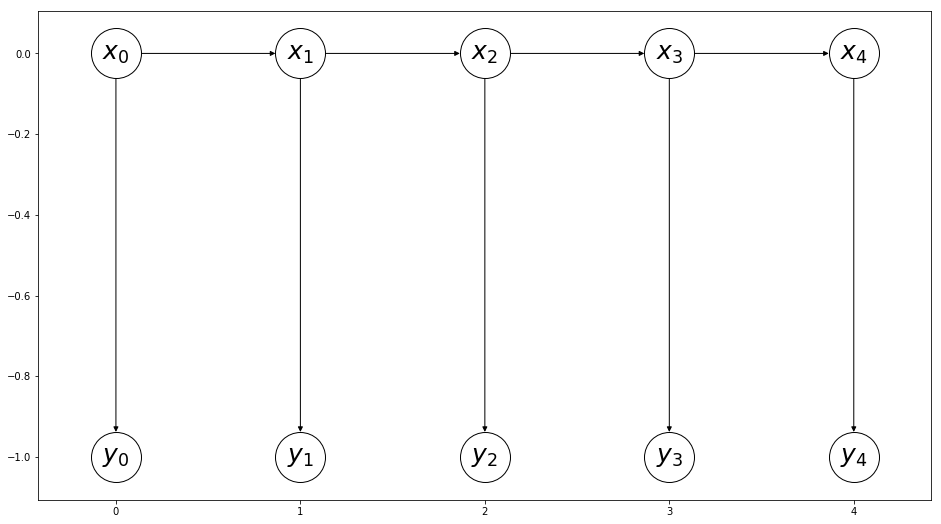

In [4]:
N = 3
T = 5

A = np.zeros((2 * T, 2 * T))
pos = [(t, 0) for t in range(T)]
pos.extend([(t, -1) for t in range(T)])

labels = {t: '$x_{}$'.format(t) for t in range(T)}
labels.update({T + t: '$y_{}$'.format(t) for t in range(T)})

for i, j in zip(range(T), range(T, 2 * T)):
    A[i, j] = 1

for i in range(T - 1):
    A[i, i + 1] = 1

G = nx.DiGraph(A)
plt.figure(figsize=(16,9))
nx.draw_networkx(
    G,
    pos,
    node_color='white',
    
    labels=labels,
    arrows=True,
    node_size=2500,
    font_size=25)
ax = plt.gca() # to get the current axis
ax.collections[0].set_edgecolor("#000000") 

### Define the conditional probability tables (i.e., the transition model and the observation model) given the verbal
Comme la distribution du positions initial est uniforme. Le vecteur de probabilités initiales est donc sous forme ci-dessous

$\pi ={\pi_i}_{i\in 1,2,\dots N}\;$ avec $\pi_i = \mathbb{P}\left(x_i = q_i\right) = \frac{1}{N}$


La matrix de transition definie comme ci-dessous:

$P(y_t = j | y_{t-1} = i) =  a_{i,j} = 
\begin{cases}
(1-\kappa)\epsilon + \frac{\kappa}{N}  &  si\: j=i \\
(1-\kappa)(1-\epsilon) + \frac{\kappa}{N} &  si\: j=i+1 \\
\frac{\kappa}{N} & autreq \; cas\\
\end{cases}
$
avec $\epsilon$, le probabilité pour le quel le robot ne bourge pas, et $\kappa$, le probabilité pour le quel le robet est kidnappé à une position aléatoirement.

La probabilités d'observation des positions est donc 


$ b_{ij} = p(y_{t} = j |x_{t} = i) = 
\begin{cases}
\frac{1}{N} + w(1-\frac{1}{N})  &  j = i \\
(1-w)(1-\frac{1}{N})  &  j\neq i \\
\end{cases}
$

In [5]:
def setup_model(N=50, ep=0.3, w=0.8, kidnap=0.0):
    '''
    Setup the parametre for the hidden markov model
    
    Parametres:
        N : Number of possible states
        ep : Probability with which the robot stays where it is
        w : Probability with which the robot can observe its true position
        kidnap: Probabimity with which the robot is kidnapped its new position.
        
    Returns:
    pri : Probabilité initial
    A : Transition matrix
    B : Observation matrix
     
    '''
    # Transition model
    
    A1 =(1 - kidnap) * (
        ep * np.eye(N) +
        (1 - ep) * np.roll(np.eye(N), 1, axis=1))
    A2 = kidnap * np.ones((N, N)) / N
    A = A1 + A2

    # Observation model
    B = w * np.eye(N) + (1 - w) * np.ones((N, N)) / N

    # Prior p(x_1)
    pri = np.ones(N, dtype=np.float64) / N

    return [pri, A, B]

## Specify the following verbal statements in terms of posterior quantities using mathematical notation. For example “the distribution of the robot’s location two time steps later given its current position at time k" should be answered as $p(x_{k+2}|x_k)$.
Dans la suite, on definie $K$ comme le longuer de la suite d'observation

- (a) Distribution of the robot’s current position given the observations so far.

\begin{eqnarray}
p(x_k|y_{1:k}) \\
\end{eqnarray}

- (b) Distribution of the robot’s position at time step k given all the observations,

\begin{eqnarray}
p(x_k|y_{1:K}) \\
\end{eqnarray}

- (c) Distribution of the robot’s next position given the observations so far,

\begin{eqnarray}
p(x_{k+1}|y_{1:k}) \\
\end{eqnarray}

- (d) Distribution of the robot’s next sensor reading given the observations so far,

\begin{eqnarray}
p(y_{k+1}|y_{1:k}) \\
\end{eqnarray}

- (e) Distribution of the robot’s initial position given observations so far,

\begin{eqnarray}
p(x_1|y_{1:k}) \\
\end{eqnarray}

- (f) Most likely current position of the robot given the observations so far,

\begin{eqnarray}
\arg\max_{x_k} p(x_{k}|y_{1:k}) \\
\end{eqnarray}


- (g) Most likely trajectory taken by the robot from the start until now given the observations so far

\begin{eqnarray}
\arg\max_{x_{1:k}} p(x_{1:k}|y_{1:k}) \\
\end{eqnarray}



## 4 Implement a program that simulates this scenario; i.e., generates realizations from the movements of the robot and the associated sensor readings. Simulate a scenario for $k = 1...100$ with $N = 50$, $\epsilon = 0,3$,$ w = 0.8$.

In [6]:
def seq_gene(model, K):
    '''
    Generate data from the model specified by the arguments.
    
    Parameters
    ----------
        model : The morkov model
        K : Numbre of time slices to simulate
        
    Returns
    -------
        states : State sequence
        obs : Observation sequence 
    '''

    # Gene value init:
    states = np.zeros(K, dtype=np.int8)
    obs = np.zeros(K, dtype=np.int8)
    pri, A, B = model
    N = pri.shape[0]

    states[0] = np.random.choice(N, p=pri)
    obs[0] = np.random.choice(N, p=B[0])

    for k in range(1, K):
        states[k] = np.random.choice(N, p=A[states[k-1]])
        obs[k] = np.random.choice(N, p=B[states[k]])
        
    return [states, obs]

Text(0.5, 0, 'time')

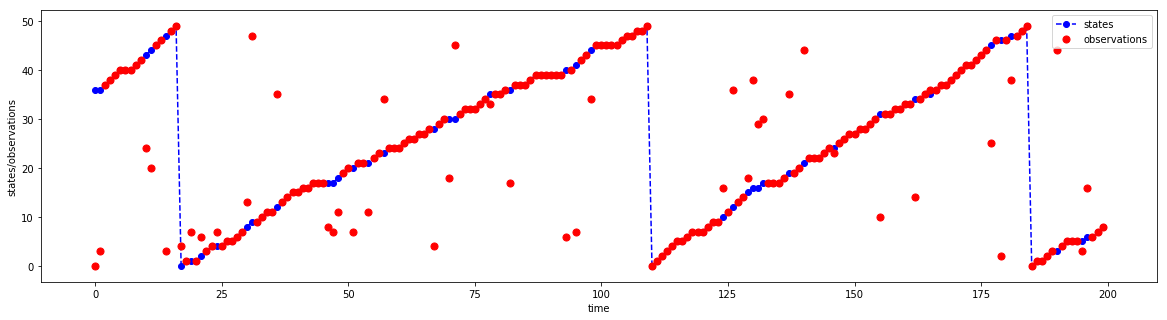

In [7]:
# Visualization for generation of sequences
K = 200
states, obs = seq_gene(setup_model(), K)

plt.figure(figsize=(20,5))
plt.plot(states, 'bo--', zorder=0)
plt.scatter(np.arange(K), obs, marker='o', c='r', s=50, zorder=1)
plt.legend(['states', 'observations'])
plt.ylabel('states/observations')
plt.xlabel('time')

Text(0.5, 0, 'time')

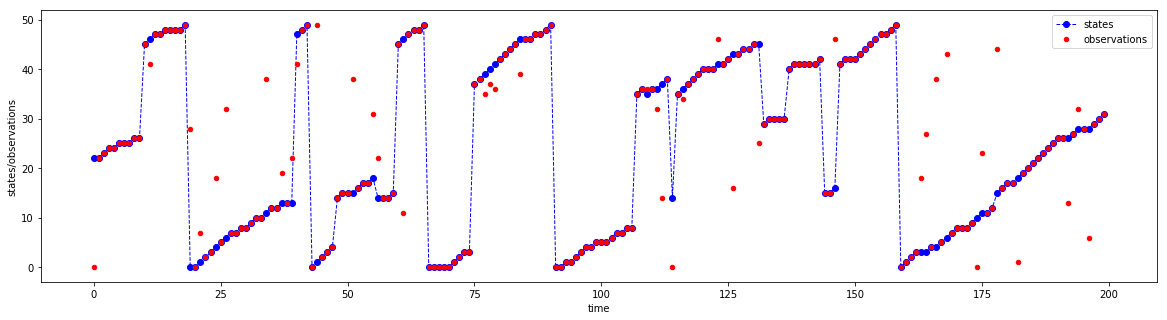

In [8]:
# Visualization for generation of sequences with kidpap = 0.1
K = 200
states, obs = seq_gene(setup_model(kidnap=0.1), K)

plt.figure(figsize=(20,5))
plt.plot(states, 'bo--', lw=1,zorder=0)
plt.scatter(np.arange(K), obs, marker='o', c='r', s=20, zorder=1)
plt.legend(['states', 'observations'])
plt.ylabel('states/observations')
plt.xlabel('time')

## Implement the Forward-Backward algorithm for computing the quantities defined in 3-a,b,f. (Attention: be careful with numerical stability! Modify the log-sum-exp trick for this algorithm)

In [9]:
# Utilies method
def normalize(A, axis=0):
    '''
    Normalize input vectors individually to unit norm (vector length).
    This function use the l1 norm.
    
    Parameters
    ----------
    A : {array-like, sparse matrix}, shape [n_samples, n_features]
        The data to normalize, element by element.

    axis : 0 or 1, optional (0 by default)
        axis used to normalize the data along. If 1, independently normalize
        each sample, otherwise (if 0) normalize each feature.

    Returns
    -------
    X : {array-like, sparse matrix}, shape [n_samples, n_features]
        Normalized input X along specified axis.
    '''
#     print('normalize', A)
    Z = np.sum(A, axis=axis, keepdims=True)
    Z[Z==0.0] = 1.0
    return A/Z

def normalize_exp(log_A, axis=0):
    '''
    Normalize input vectors with log scale individually to unit norm 
    (vector length).
    This function use the l1 norm. 
    
    Parameters
    ----------
    log_A : {array-like, sparse matrix}, shape [n_samples, n_features]
        The data to normalize, element by element.

    axis : 0 or 1, optional (0 by default)
        axis used to normalize the data along. If 1, independently normalize
        each sample, otherwise (if 0) normalize each feature.

    Returns
    -------
    X : {array-like, sparse matrix}, shape [n_samples, n_features]
        Normalized input X along specified axis.
    '''
    
    a = np.max(log_A, keepdims=True, axis=axis)
    res = normalize(np.exp(log_A - a), axis=axis)
    if(-np.inf in a):
        res[:, (a == -np.inf)[0]] = 0.0
    return  res
    

In [10]:
# Test utilies method
ld_settings = np.seterr(all='ignore') 
class TestUtilies(unittest.TestCase):
    
    def setUp(self):
        self.A = np.random.randint(0,10,(5,4))
        self.A[:,1] = 0
        
    def testNormalize(self):
        Z1 = normalize(self.A, axis=0)
        Z2 = preprocessing.normalize(self.A, norm='l1', axis=0)
        self.assertEqual(np.sum(Z1-Z2), 0.0)
        
    def testNormalizeExp(self):
        Z1 = normalize_exp(np.log(self.A), axis=0)
        Z2 = preprocessing.normalize(np.exp(np.log(self.A)), norm='l1', axis=0)
        self.assertAlmostEqual(np.sum(Z1-Z2), 0.0, 15)
        
        
unittest.main(argv=[''], verbosity=2,exit=False)

testNormalize (__main__.TestUtilies) ... ok
testNormalizeExp (__main__.TestUtilies) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.005s

OK


In [11]:
def state_predict(A, log_p):
    
    mx = np.max(log_p)
    p = np.exp(log_p - mx)
    return np.log(A.T.dot(np.exp(log_p-mx))) + mx

def state_update(obs, log_p):
    return np.log(obs) + log_p
    
def forward_method(hm, obs_seq):
    '''
    Implementation of the forward_method.
    
    Parameters
    ----------
    hm : Hiidden Markov Model with structure [Pi, A, B].
        Pi is initial probalility vectors.
        A is transition matrix.
        B is emission matrix.

    obs_seq: A list containing the list of obervation 

    Returns
    -------
    alpha : matrix, shape [n_states, n_steps]
        alpha[i,j] = p(obs_seq[0:i], s_seq[i]==j)
        
    alpha_pred
        alpha_pred[i,j] = p(obs_seq[0:i-1], s_seq[i]==j)
    '''
        
    # Initiliaze parameter
    pri, A, B = hm
    log_B = np.log(B)
    K, N = len(obs_seq), A.shape[0]
    alpha = np.zeros((N, K))
    alpha_pred = np.zeros((N, K))

    alpha[:,0] = np.log(B[:,obs_seq[0]] * pri)
    #print(alpha[:,0],B[:,obs_seq[0]], pri)

    for k in np.arange(1, K):
        alpha_pred[:, k] = state_predict(A, alpha[:,k-1])
        alpha[:, k] = log_B[:, obs_seq[k]]  + alpha_pred[:, k]   

    return alpha, alpha_pred

def state_post(A, log_p):
    mx = np.max(log_p)
    p = np.exp(log_p - mx)
    return np.log(A.dot(np.exp(log_p-mx))) + mx

def backward_method(hm, obs_seq):
    '''
    Implementation of the backward_method.
    
    Parameters
    ----------
    hm : Hiidden Markov Model with structure [Pi, A, B].
        Pi is initial probalility vectors.
        A is transition matrix.
        B is emission matrix.

    obs_seq: A list containing the list of obervation 

    Returns
    -------
    beta : matrix, shape [n_states, n_steps]
        neta[i,j] = p(obs_seq[i:K+1], s_seq[i]==j)
        
    beta_post
        beta_post[i,j] = p(obs_seq[i+1:(K+1)], s_seq[i]==j)
    '''
    # Initiliaze parameter
    pri, A, B = hm
    log_B = np.log(B)
    K, N = len(obs_seq), A.shape[0]
    log_beta = np.zeros((N, K))
    log_beta_post = np.zeros((N, K))
    
    log_beta_post[:,K-1] = np.log(1.0)
    log_beta[:,K-1] = log_B[:, obs_seq[K-1]] + log_beta_post[:, K-1]
    
    for k in np.arange(K-2, -1, -1):
        log_beta_post[:, k] = state_post(A, log_beta[:,k+1])
        log_beta[:, k] = log_B[:, obs_seq[k]]  + log_beta_post[:, k]

    return log_beta, log_beta_post

def forward_backward_smoother(hm, obs_seq):
    '''
    Implementation of the forward-backward method.
    
    Parameters
    ----------
    hm : Hiidden Markov Model with structure [Pi, A, B].
        Pi is initial probalility vectors.
        A is transition matrix.
        B is emission matrix.

    obs_seq: A list containing the list of obervation 

    Returns
    -------
    gamma : matrix, shape [n_states, n_steps]
        gamma[i,j] = p(obs_seq[0:K], s_seq[i]==j)
    '''
    
    # Initiliaze parameter
    log_alpha, log_alpha_pred = forward_method(hm, obs_seq)
    log_beta, log_beta_post = backward_method(hm, obs_seq)
    
    log_gamma = log_alpha + log_beta_post
    return log_gamma

In [12]:
# Test
pri = np.array([0.2, 0.4, 0.4])
A = np.array([[0.5, 0.2, 0.3],
    [0.3,0.5, 0.2],
    [0.2,0.3,0.5]])
B = np.array([[0.5,0.5], [0.4,0.6], [0.7,0.3]])
model = [pri, A, B]
[beta,beta__pred] = forward_method(model, np.array([0,1,0]))
beta = np.exp(beta)
beta

array([[0.1     , 0.077   , 0.04187 ],
       [0.16    , 0.1104  , 0.035512],
       [0.28    , 0.0606  , 0.052836]])

In [13]:
model = setup_model()
K = 100
state_seq, obs_seq = seq_gene(model, K)

[log_alpha, log_alpha_pred] = forward_method(model, obs_seq)
[log_beta, log_beta_post] = backward_method(model, obs_seq)
log_gamma = forward_backward_smoother(model, obs_seq)

alpha = normalize_exp(log_alpha, axis=0)
alpha_pred = normalize_exp(log_alpha_pred, axis=0)
beta = normalize_exp(log_beta, axis=0)
beta_post = normalize_exp(log_beta_post, axis=0)
gamma = normalize_exp(log_beta_post, axis=0)

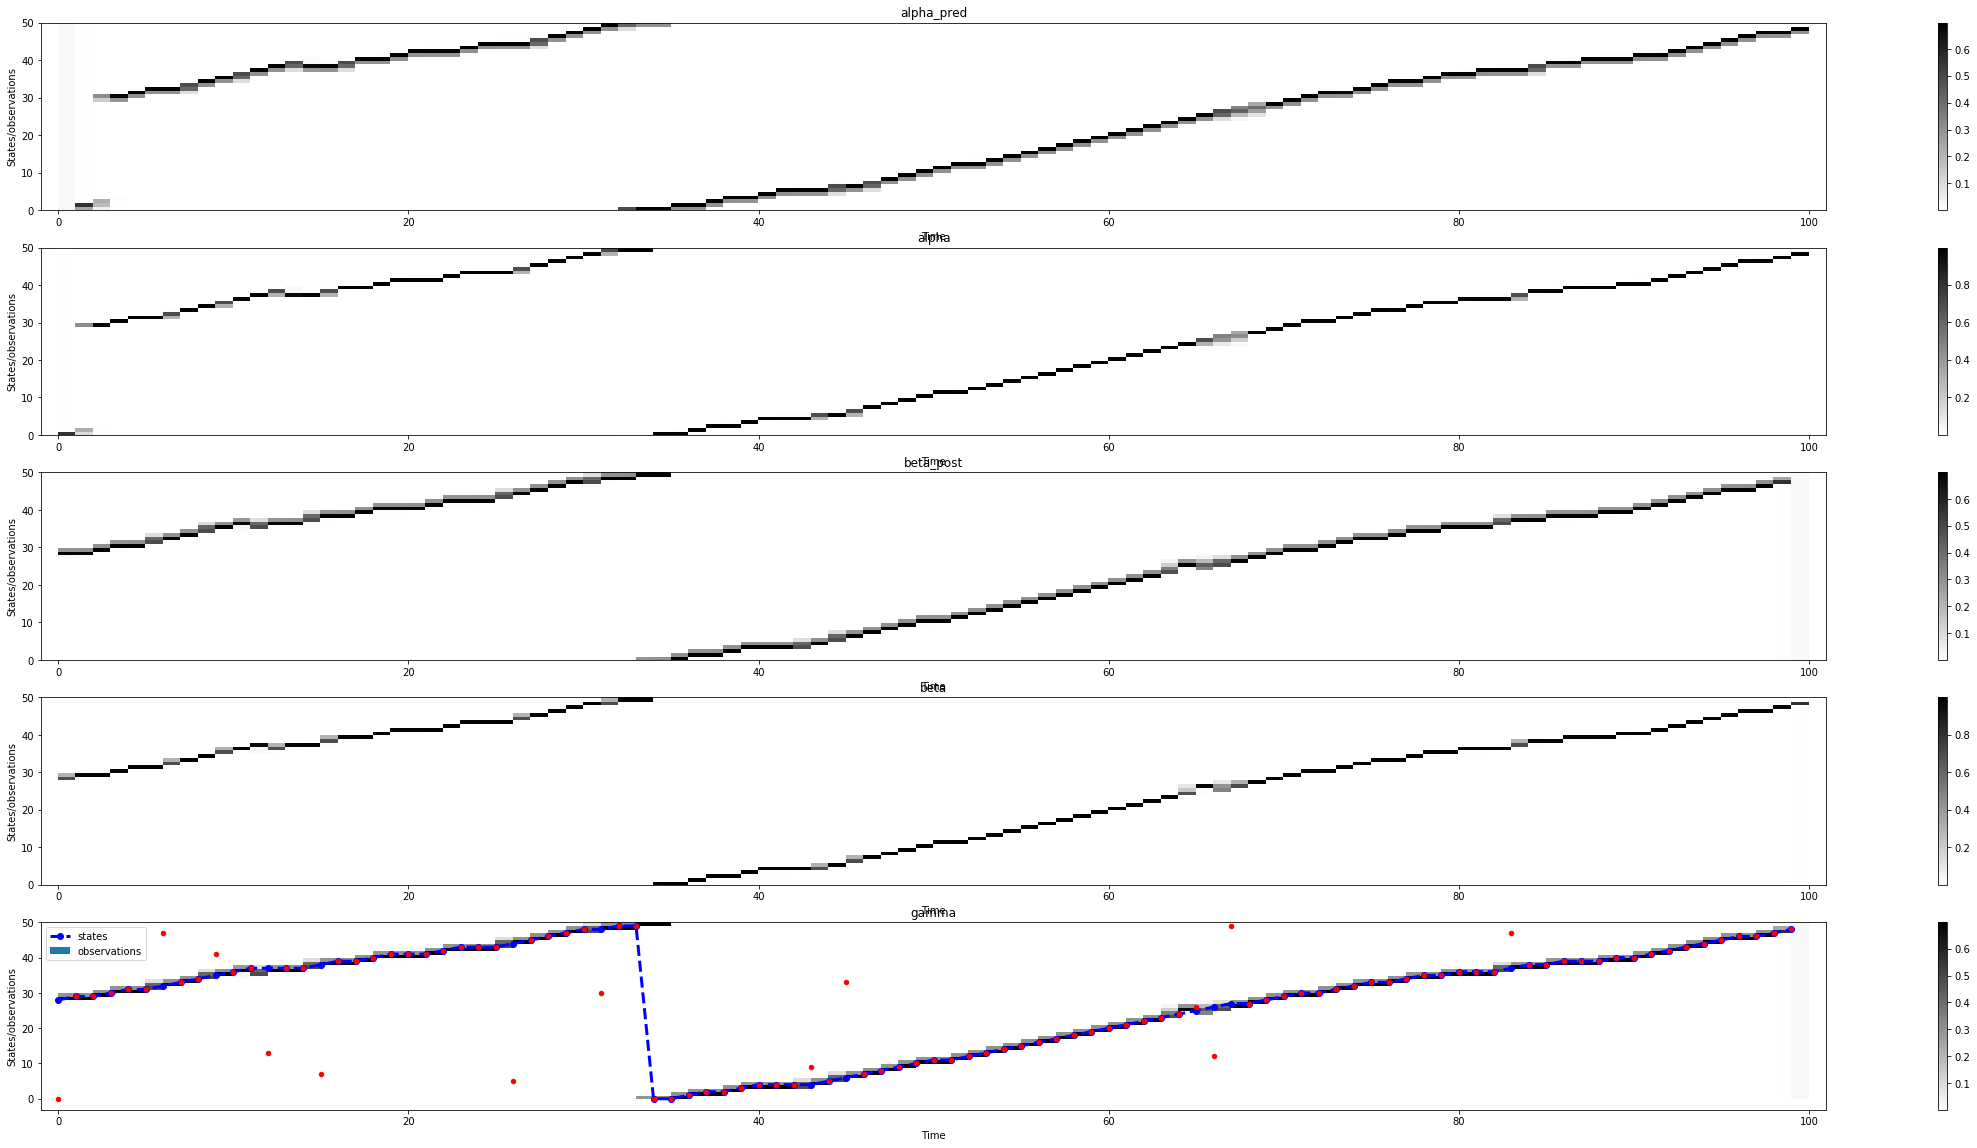

In [14]:
fig, ax = plt.subplots(5, 1)
fig.set_size_inches(40, 20)

titles = ['alpha_pred', 'alpha', 'beta_post', 'beta', 'gamma']
values = [alpha_pred, alpha, beta_post, beta, gamma]

for i in range(len(ax)):
    im = ax[i].pcolor(values[i], cmap='gray_r')
    plt.colorbar(im, ax=ax[i])
    ax[i].set_title(titles[i])
    ax[i].set_ylabel('States/observations')
    ax[i].set_xlabel('Time')
    ax[i].set_xlim([-1,101])

ax[4].plot(state_seq, 'bo--', zorder=1, lw=3)
ax[4].scatter(np.arange(K), obs_seq, marker='o', c='r', s=20, zorder=2)
ax[4].legend(['states', 'observations'])

plt.show()

D'après la figure ci-desous, on peut constact que l'on peut déduire la suite des états par forward-backward methode. Le resultat obtenu par cette méthode est bien correspond à la suite des états.

## Assume now that at each step the robot can be kidnapped with probability κ. If the robot is kidnapped its new position is independent from its previous position and is uniformly distributed. Repeat 4 and 5 for this new model with $\kappa = 0.1$. Can you reuse your code?

In [15]:
model = setup_model(kidnap = 0.1)
K = 100
state_seq, obs_seq = seq_gene(model, K)

[log_alpha, log_alpha_pred] = forward_method(model, obs_seq)
[log_beta, log_beta_post] = backward_method(model, obs_seq)
log_gamma = forward_backward_smoother(model, obs_seq)

alpha = normalize_exp(log_alpha, axis=0)
alpha_pred = normalize_exp(log_alpha_pred, axis=0)
beta = normalize_exp(log_beta, axis=0)
beta_post = normalize_exp(log_beta_post, axis=0)
gamma = normalize_exp(log_beta_post, axis=0)

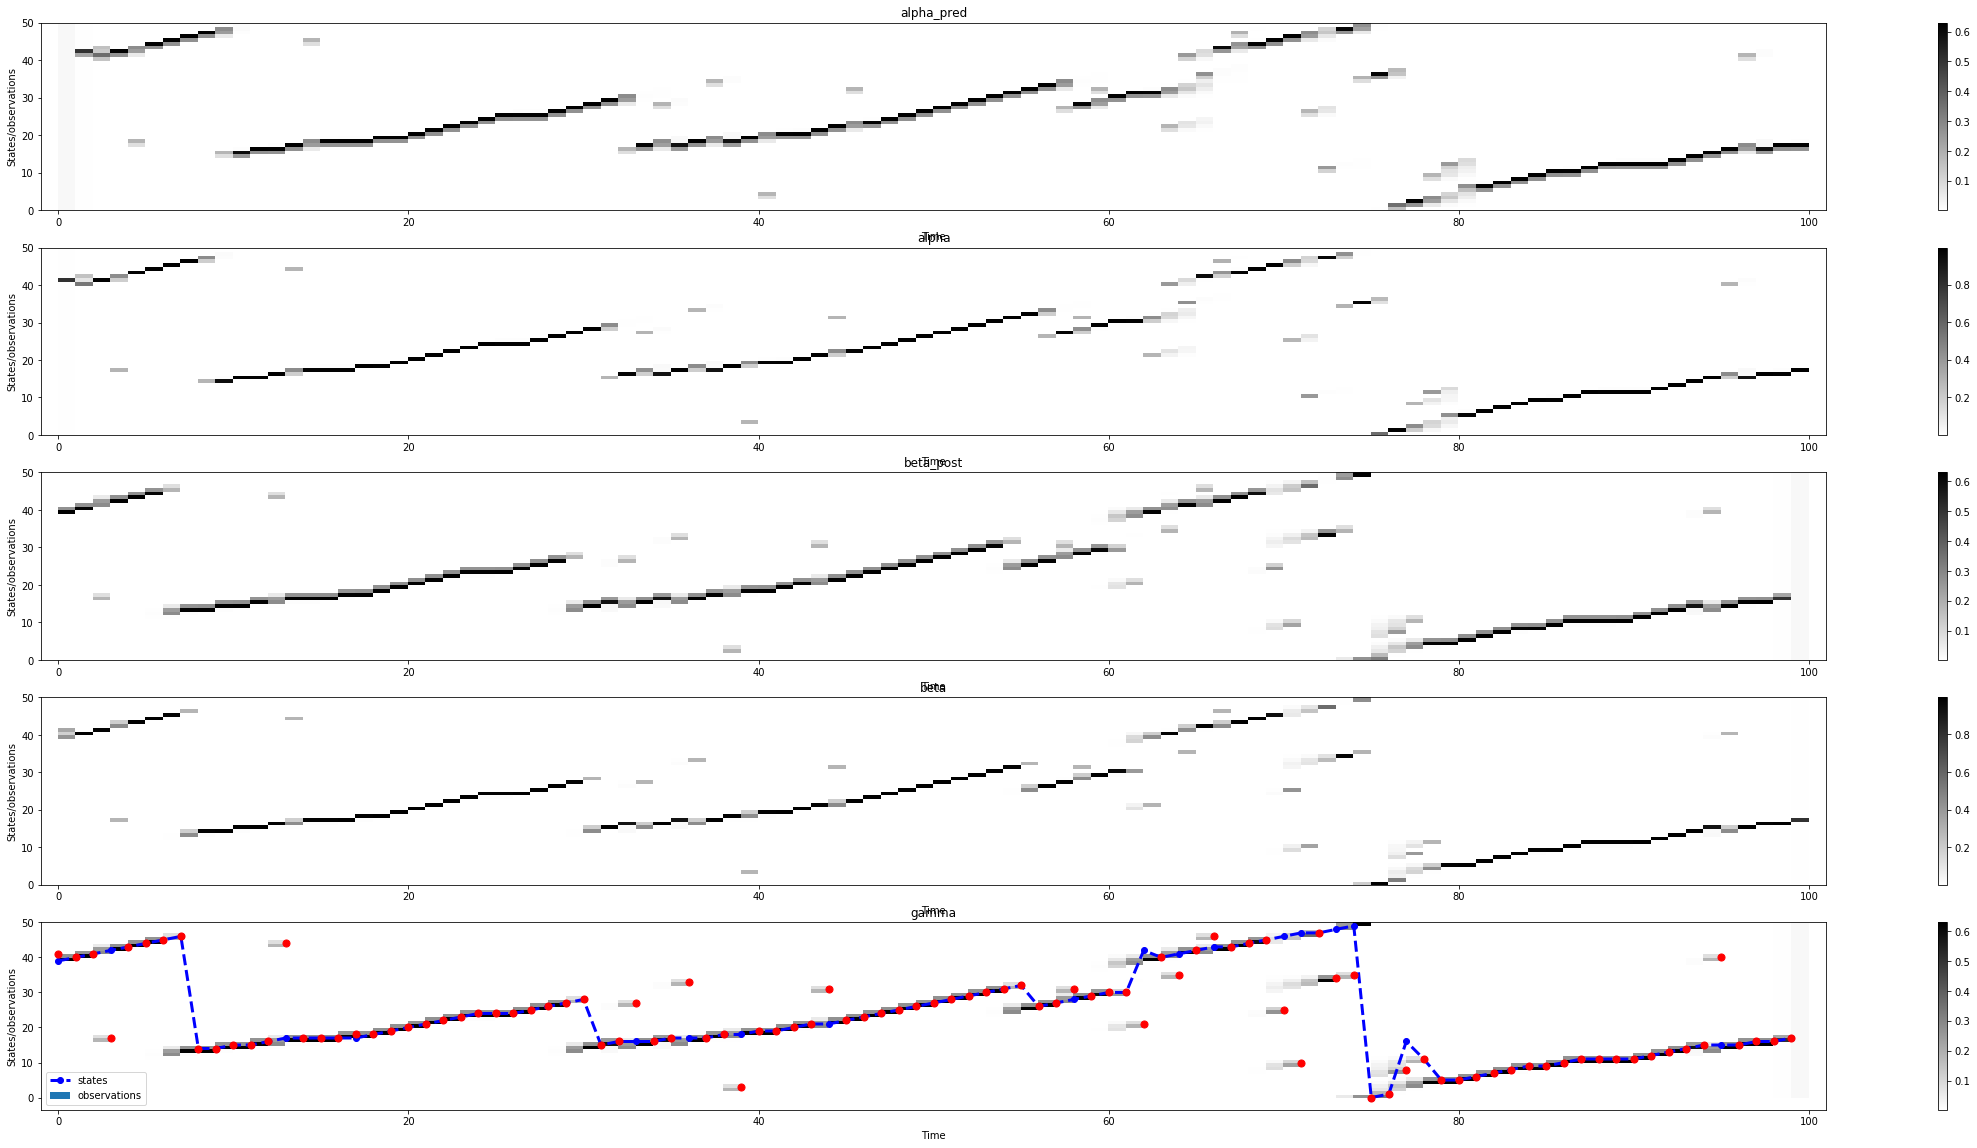

In [16]:
fig, ax = plt.subplots(5, 1)
fig.set_size_inches(40, 20)

titles = ['alpha_pred', 'alpha', 'beta_post', 'beta', 'gamma']
values = [alpha_pred, alpha, beta_post, beta, gamma]

for i in range(len(ax)):
    im = ax[i].pcolor(values[i], cmap='gray_r')
    plt.colorbar(im, ax=ax[i])
    ax[i].set_title(titles[i])
    ax[i].set_ylabel('States/observations')
    ax[i].set_xlabel('Time')
    ax[i].set_xlim([-1,101])

ax[4].plot(state_seq, 'bo--', zorder=1, lw=3)
ax[4].scatter(np.arange(K), obs_seq, marker='o', c='r', s=50, zorder=2)
ax[4].legend(['states', 'observations'])

plt.show()

Après la modification, le taux de prediction correct est diminue. Mais le resultat est aussi proch à la suite des éttas réel.